In [1]:
# Binary classification of benign and attack for Bluetooth data of CICIoMT-2024 using TM.
# Copyright @ Rahul

Loading files

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
base_folder = "/Users/rahulkj/downloads/data_bt"   # Bluetooth data
files = os.listdir(base_folder)
print(files)
print(f"Number of CSV files: {len(files)}")

['Bluetooth_Benign_train.csv', 'Bluetooth_DoS_train.csv', 'Bluetooth_Benign_test.csv', 'Bluetooth_DoS_test.csv']
Number of CSV files: 4


Reading Data and Combining

In [3]:
import pandas as pd
folder_path = os.path.join(base_folder)

df1_train = pd.read_csv(os.path.join(folder_path, files[0])) 
df1_train['Dependent'] = 0 # Benign

df2_train = pd.read_csv(os.path.join(folder_path, files[1]))  
df2_train['Dependent'] = 1 # DoS

df1_test = pd.read_csv(os.path.join(folder_path, files[2]))  
df1_test['Dependent'] = 0 # Benign

df2_test = pd.read_csv(os.path.join(folder_path, files[3]))  
df2_test['Dependent'] = 1 # DoS

print(df1_train.shape, df2_train.shape)
print(df1_test.shape, df2_test.shape)

(21750, 28) (99840, 28)
(6533, 28) (25171, 28)


In [4]:
df_train = pd.concat([df1_train, df2_train], ignore_index=True)
df_test = pd.concat([df1_test, df2_test], ignore_index=True)

print(df_train.shape)
print(df_test.shape)

(121590, 28)
(31704, 28)


Analysing the training and testing datasets.

Checking missing values, duplicates, data types, and descriptive statistics for both training and testing datasets.


In [5]:
print("Training data info:")
df_train.info()

print("\nTesting data info:")
df_test.info()

print("\nMissing values in training data:")
print(df_train.isnull().sum())

print("\nMissing values in testing data:")
print(df_test.isnull().sum())

print("\nDuplicate rows in training data:")
print(df_train.duplicated().sum())

print("\nDuplicate rows in testing data:")
print(df_test.duplicated().sum())

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121590 entries, 0 to 121589
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Header_Length             121590 non-null  float64
 1   Protocol_Type             121590 non-null  int64  
 2   Packet_Type               121590 non-null  float64
 3   Rate                      121590 non-null  float64
 4   HCI_Command               121590 non-null  float64
 5   HCI_Event                 121590 non-null  float64
 6   HCI_ACL_Data              121590 non-null  float64
 7   HCI_SCO_Data              121590 non-null  float64
 8   Command_Complete          121590 non-null  float64
 9   Command_Status            121590 non-null  float64
 10  LE_Meta                   121590 non-null  float64
 11  Connection_Complete       121590 non-null  float64
 12  Disconnection_Complete    121590 non-null  float64
 13  Inquiry_Complete        

Generating descriptive statistics for both training and testing datasets to understand their distribution.



In [6]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

print("\nDescriptive statistics for training data before cleaning:")
display(df_train.describe())

print("\nDescriptive statistics for testing data before cleaning:")
display(df_test.describe())


Descriptive statistics for training data before cleaning:


,Header_Length,Protocol_Type,Packet_Type,Rate,HCI_Command,HCI_Event,HCI_ACL_Data,HCI_SCO_Data,Command_Complete,Command_Status,LE_Meta,Connection_Complete,Disconnection_Complete,Inquiry_Complete,Advertising_Report,Read_Remote_Features,Encryption_Change,Number_Completed_Packets,Tot_sum,Min,Max,AVG,Std,Tot_size,IAT,Number,Variance,Dependent
count,121590.000000,121590.000000,121590.000000,121590.000000,121590.000000,121590.000000,121590.000000,121590.0,121590.000000,121590.000000,121590.000000,121590.0,121590.000000,121590.0,121590.0,121590.000000,121590.0,121590.000000,121590.000000,121590.000000,121590.000000,121590.000000,121589.000000,121590.000000,121590.000000,121590.000000,121589.000000,121590.000000
mean,7.876436,2.294070,3.109132,540.610446,0.007216,0.558174,0.434610,0.0,0.006373,0.000843,0.134898,0.0,0.000021,0.0,0.0,0.000015,0.0,0.415268,267.668871,13.806670,38.485155,26.767748,12.217032,26.767748,1.621506,9.999868,165.769857,0.821120
std,0.344903,0.720031,0.341379,814.303187,0.049937,0.169746,0.178639,0.0,0.045666,0.009478,0.328841,0.0,0.001434,0.0,0.0,0.001217,0.0,0.182626,71.430768,5.843084,10.020081,7.146181,4.063756,7.146181,263.813012,0.032698,403.466299,0.383253
min,7.000000,1.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,36.000000,8.000000,11.000000,9.800000,0.000000,9.800000,0.000010,1.000000,0.000000,0.000000
25%,8.000000,2.000000,3.000000,112.351742,0.000000,0.500000,0.500000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.500000,240.000000,12.000000,36.000000,24.000000,12.649111,24.000000,0.004097,10.000000,160.000000,1.000000
50%,8.000000,2.000000,3.000000,212.820247,0.000000,0.500000,0.500000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.500000,240.000000,12.000000,36.000000,24.000000,12.649111,24.000000,0.005897,10.000000,160.000000,1.000000
75%,8.000000,2.000000,3.000000,312.881675,0.000000,0.500000,0.500000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.500000,240.000000,12.000000,36.000000,24.000000,12.649111,24.000000,0.008905,10.000000,160.000000,1.000000
max,9.000000,4.000000,4.000000,4685.849626,0.500000,1.000000,1.000000,0.0,0.500000,0.300000,1.000000,0.0,0.100000,0.0,0.0,0.100000,0.0,0.500000,1307.000000,50.000000,262.000000,130.700000,127.649259,130.700000,67768.654292,10.000000,16294.333333,1.000000



Descriptive statistics for testing data before cleaning:


,Header_Length,Protocol_Type,Packet_Type,Rate,HCI_Command,HCI_Event,HCI_ACL_Data,HCI_SCO_Data,Command_Complete,Command_Status,LE_Meta,Connection_Complete,Disconnection_Complete,Inquiry_Complete,Advertising_Report,Read_Remote_Features,Encryption_Change,Number_Completed_Packets,Tot_sum,Min,Max,AVG,Std,Tot_size,IAT,Number,Variance,Dependent
count,31704.000000,31704.000000,31704.000000,31704.000000,31704.000000,31704.000000,31704.000000,31704.0,31704.000000,31704.000000,31704.000000,31704.0,31704.000000,31704.0,31704.0,31704.000000,31704.0,31704.000000,31704.000000,31704.000000,31704.000000,31704.000000,31704.000000,31704.000000,31704.000000,31704.000000,31704.000000,31704.000000
mean,7.849426,2.349420,3.145477,204.480338,0.002549,0.574013,0.423439,0.0,0.002280,0.000271,0.172104,0.0,0.000038,0.0,0.0,0.000038,0.0,0.399177,276.926571,15.483945,38.577687,27.692808,11.451399,27.692808,1.376740,9.999937,144.546377,0.793938
std,0.413016,0.763426,0.413034,103.927579,0.030335,0.205955,0.208168,0.0,0.029045,0.006348,0.375941,0.0,0.001945,0.0,0.0,0.001945,0.0,0.198436,78.949545,8.094266,8.194826,7.894838,3.662274,7.894838,242.860566,0.011232,266.395567,0.404482
min,7.000000,1.000000,2.000000,0.000023,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,102.000000,8.000000,11.000000,10.200000,0.000000,10.200000,0.000657,8.000000,0.000000,0.000000
25%,8.000000,2.000000,3.000000,113.557833,0.000000,0.500000,0.500000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.500000,240.000000,12.000000,36.000000,24.000000,12.649111,24.000000,0.005898,10.000000,160.000000,1.000000
50%,8.000000,2.000000,3.000000,172.208951,0.000000,0.500000,0.500000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.500000,240.000000,12.000000,36.000000,24.000000,12.649111,24.000000,0.006011,10.000000,160.000000,1.000000
75%,8.000000,2.000000,3.000000,322.415558,0.000000,0.500000,0.500000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.500000,240.000000,12.000000,36.000000,24.000000,12.649111,24.000000,0.009102,10.000000,160.000000,1.000000
max,9.000000,4.000000,4.000000,1867.787674,0.500000,1.000000,1.000000,0.0,0.500000,0.300000,1.000000,0.0,0.100000,0.0,0.0,0.100000,0.0,0.500000,1300.000000,47.000000,262.000000,130.000000,125.437014,130.000000,43242.823472,10.000000,15734.444444,1.000000


Removing missing values and duplicate rows from the training and testing dataframes and printing the shape of the dataframes 



In [7]:
df_train.dropna(inplace=True)
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

print(f"Number of rows in df_train after cleaning: {df_train.shape[0]}")
print(f"Number of rows in df_test after cleaning: {df_test.shape[0]}")

Number of rows in df_train after cleaning: 87299
Number of rows in df_test after cleaning: 30512


In [8]:
df_train.head()

,Header_Length,Protocol_Type,Packet_Type,Rate,HCI_Command,HCI_Event,HCI_ACL_Data,HCI_SCO_Data,Command_Complete,Command_Status,LE_Meta,Connection_Complete,Disconnection_Complete,Inquiry_Complete,Advertising_Report,Read_Remote_Features,Encryption_Change,Number_Completed_Packets,Tot_sum,Min,Max,AVG,Std,Tot_size,IAT,Number,Variance,Dependent
0,7.5,1,2.5,111.637038,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123,8,19,12.3,4.522782,12.3,0.008958,10,20.455556,0
1,7.5,1,2.5,534.871775,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184,8,75,18.4,20.467861,18.4,0.001900,10,418.933333,0
2,7.5,1,2.5,1315.983936,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119,8,21,11.9,4.724640,11.9,0.000789,10,22.322222,0
3,7.5,1,2.5,805.095111,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124,8,19,12.4,3.921451,12.4,0.001281,10,15.377778,0
4,7.5,1,2.5,339.663762,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101,8,11,10.1,1.100505,10.1,0.003080,10,1.211111,0


In [9]:
df_test.head()

,Header_Length,Protocol_Type,Packet_Type,Rate,HCI_Command,HCI_Event,HCI_ACL_Data,HCI_SCO_Data,Command_Complete,Command_Status,LE_Meta,Connection_Complete,Disconnection_Complete,Inquiry_Complete,Advertising_Report,Read_Remote_Features,Encryption_Change,Number_Completed_Packets,Tot_sum,Min,Max,AVG,Std,Tot_size,IAT,Number,Variance,Dependent
0,7.1,4,3.7,531.523362,0.1,0.9,0.0,0.0,0.2,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,591,11,249,59.1,68.372265,59.1,0.001881,10,4674.766667,0
1,7.4,4,2.8,144.855949,0.4,0.6,0.0,0.0,0.4,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,401,8,249,40.1,74.650966,40.1,0.007359,10,5572.766667,0
2,7.0,4,4.0,72.020179,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450,32,50,45.0,6.582806,45.0,0.014713,10,43.333333,0
3,7.2,4,3.4,162.617195,0.2,0.8,0.0,0.0,0.2,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,763,11,249,76.3,92.259357,76.3,0.006188,10,8511.788889,0
4,7.1,4,3.7,72.108461,0.1,0.9,0.0,0.0,0.1,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,630,11,249,63.0,66.399465,63.0,0.014397,10,4408.888889,0


Examining the distribution of the target variable using counts and visualisations.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Calculating and displaying the value counts for the 'Dependent' column in both the training and testing dataframes, and then creating bar plots to visualise these distributions.

In [11]:
# Number of samples in training and testing data after cleaning

train_counts = df_train['Dependent'].value_counts()
test_counts = df_test['Dependent'].value_counts()
train_counts.sort_index(inplace = True)
test_counts.sort_index(inplace = True)

print("Value counts for 'Dependent' in training data after cleaning:")
print(train_counts)

print("\nValue counts for 'Dependent' in testing data after cleaning:")
print(test_counts)

Value counts for 'Dependent' in training data after cleaning:
Dependent
0    21750
1    65549
Name: count, dtype: int64

Value counts for 'Dependent' in testing data after cleaning:
Dependent
0     6533
1    23979
Name: count, dtype: int64


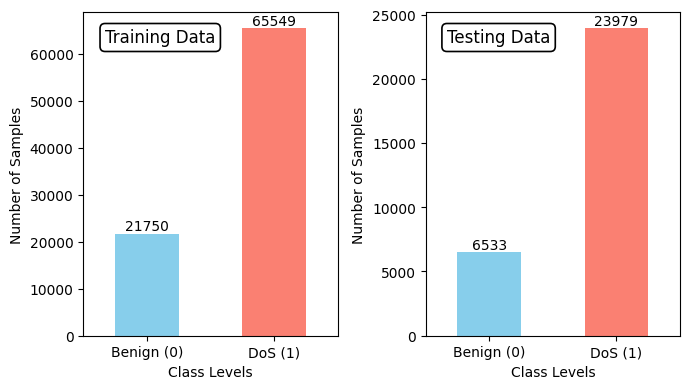

In [12]:
# Seeing the distribution of each class in training and testing data after cleaning

import matplotlib.pyplot as plt
import os

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

# -------------------------
# Training data plot
# -------------------------
train_ax = train_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_xlabel('Class Levels')  # Dependent variable
axes[0].set_ylabel('Number of Samples')
axes[0].set_xticks(ticks=[0, 1], labels=['Benign (0)', 'DoS (1)'], rotation=0)

# Annotate bars (training)
for p in train_ax.patches:
    axes[0].annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

axes[0].text(0.52, 0.95, "Training Data",transform=axes[0].transAxes,ha='right', va='top',
    fontsize=12,bbox=dict(facecolor='white', edgecolor='black',boxstyle='round,pad=0.3', linewidth=1.2))

# -------------------------
# Testing data plot
# -------------------------
test_ax = test_counts.plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_xlabel('Class Levels')  # Dependent variable
axes[1].set_ylabel('Number of Samples')
axes[1].set_xticks(ticks=[0, 1], labels=['Benign (0)', 'DoS (1)'], rotation=0)

# Annotate bars (testing)
for p in test_ax.patches:
    axes[1].annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

axes[1].text(0.49, 0.95, "Testing Data",transform=axes[1].transAxes,ha='right', va='top',
    fontsize=12,bbox=dict(facecolor='white', edgecolor='black',boxstyle='round,pad=0.3', linewidth=1.2))

plt.tight_layout()

'''
# Save figure
output_folder = "results"
os.makedirs(output_folder, exist_ok=True)
output_file_path = os.path.join(output_folder, "final_data_dist_bt.pdf")
plt.savefig(output_file_path, format="pdf", bbox_inches="tight", pad_inches=0.03)
'''

#plt.savefig("final_data_dist_bt.pdf", format="pdf", bbox_inches="tight", pad_inches=0.03)
plt.show()

Visualizing feature distributions: Creating distribution plots for all features in the datasets.

Iterating through each feature column in the training and testing dataframes and plotting histograms to visualise their distributions.

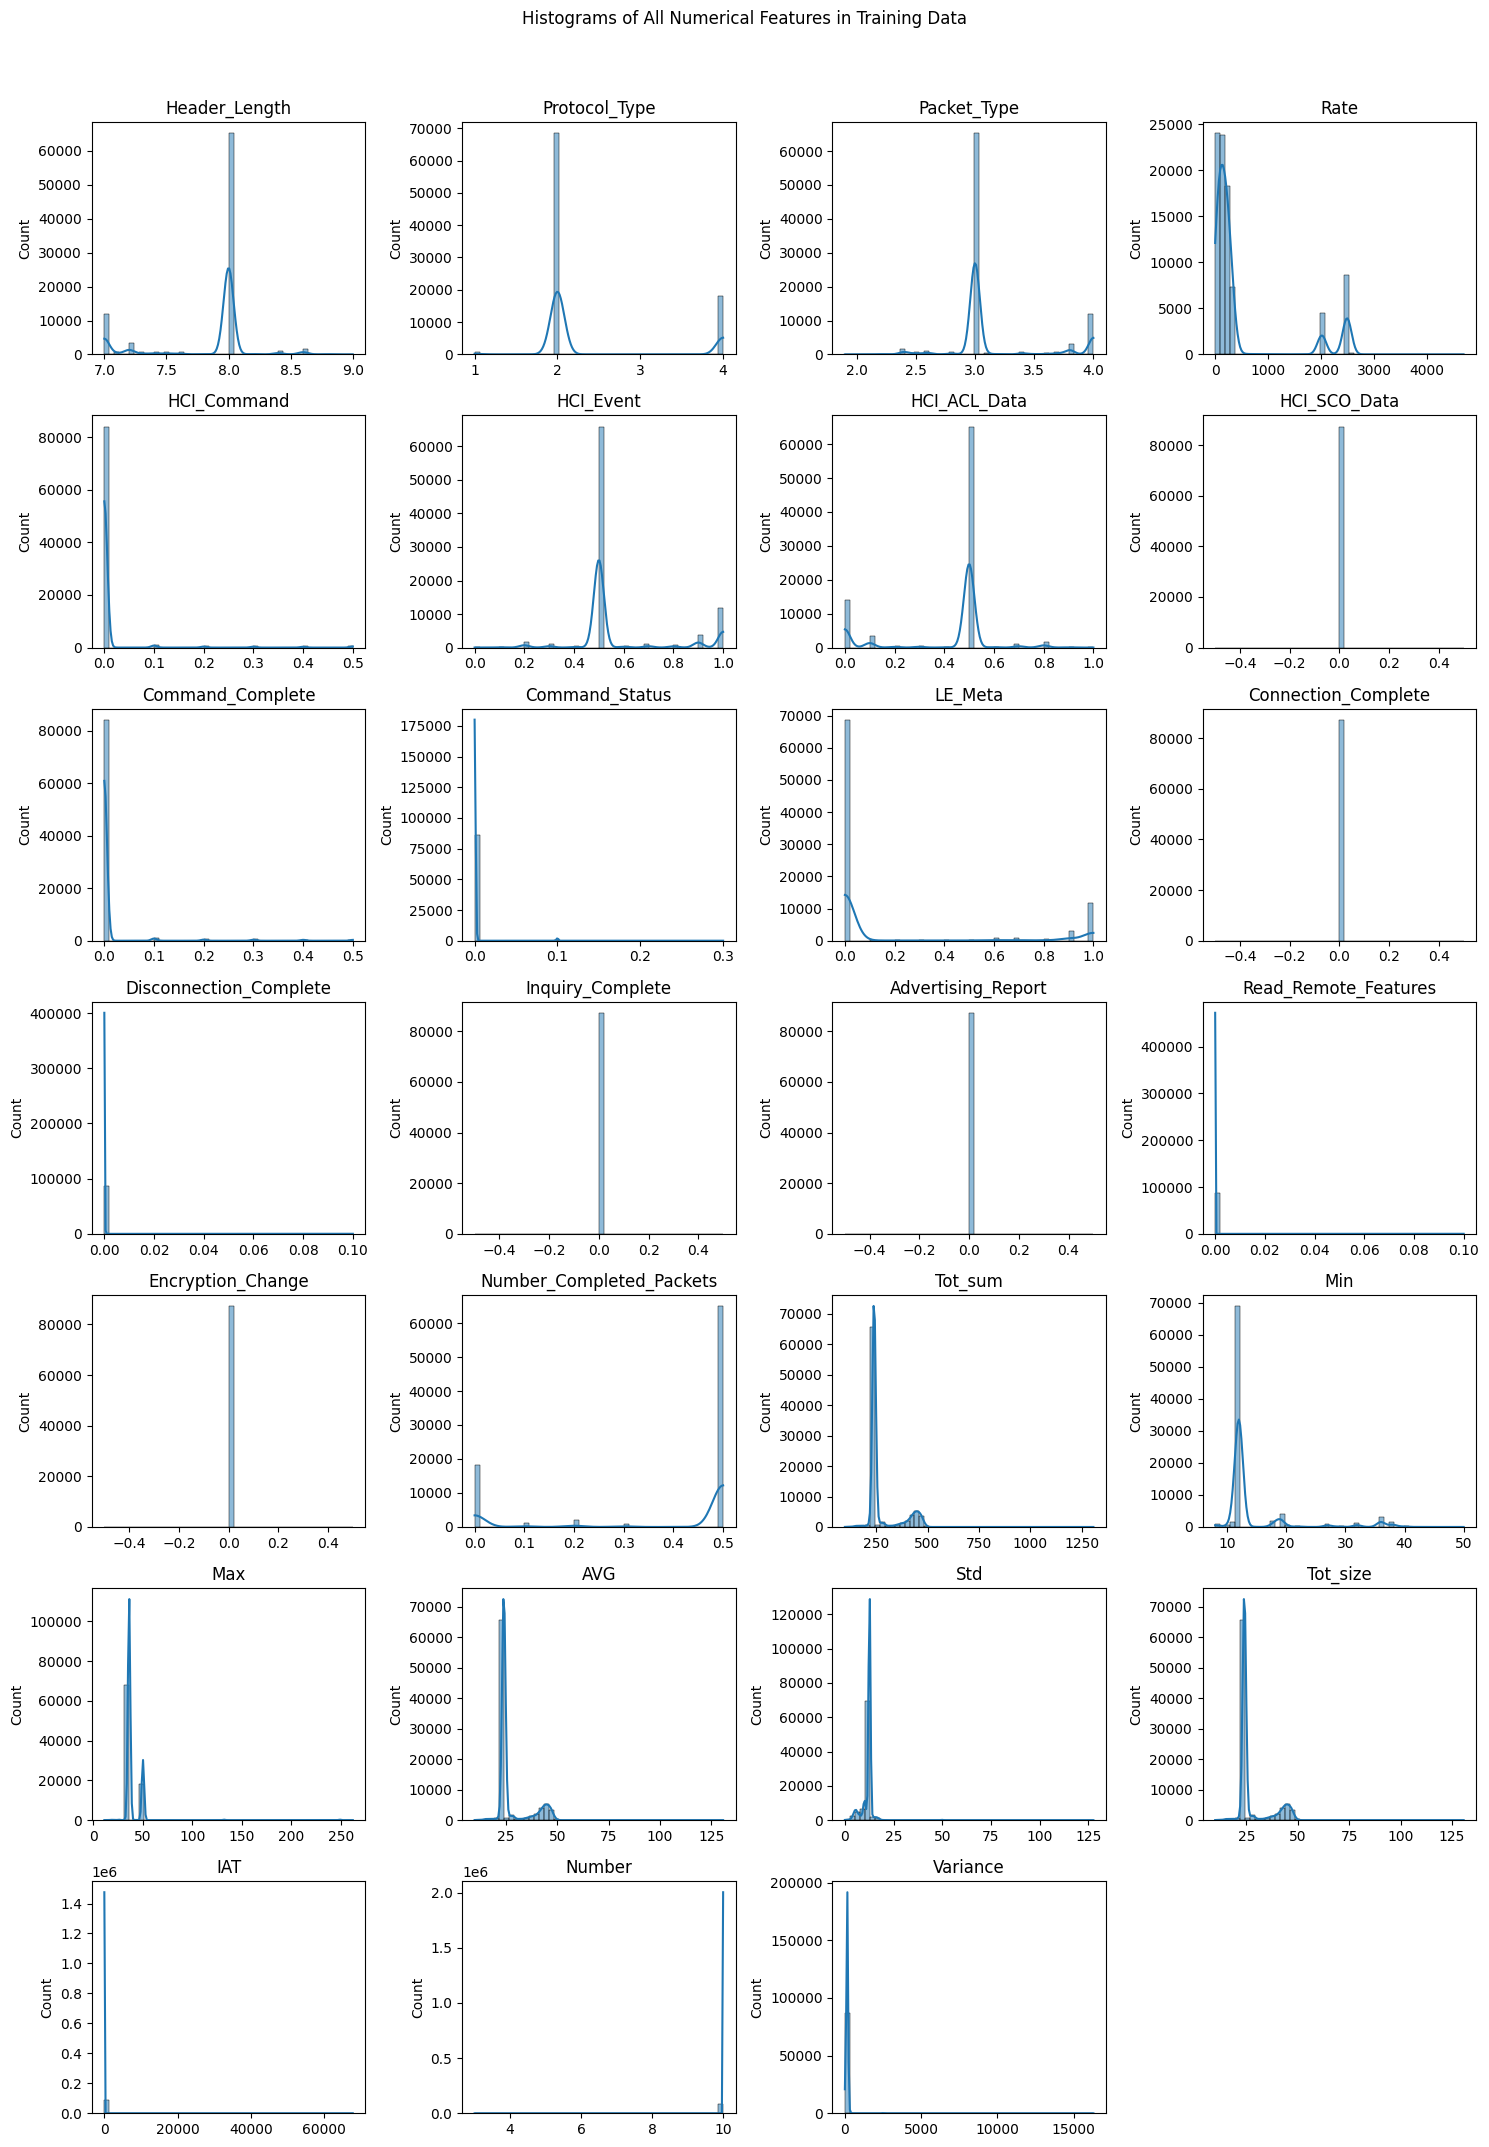

In [13]:
# Visualise the distribution of all numerical features (excluding the target variable)

features_to_visualize = df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
features_to_visualize.remove('Dependent') # Remove the target variable

# Determine the number of rows and columns for the subplots
n_features = len(features_to_visualize)
n_cols = 4 # can adjust the number of columns 
n_rows = (n_features + n_cols - 1) // n_cols # to calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
fig.suptitle('Histograms of All Numerical Features in Training Data', y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(features_to_visualize):
    sns.histplot(data=df_train, x=feature, bins=50, kde=True, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('') # Remove x-label to avoid clutter

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Performing a bivariate analysis to analyse the relationship between pairs of variables.

Selecting a subset of features based on the distribution plots and creating scatter plots to visualise their relationships with the target variable.

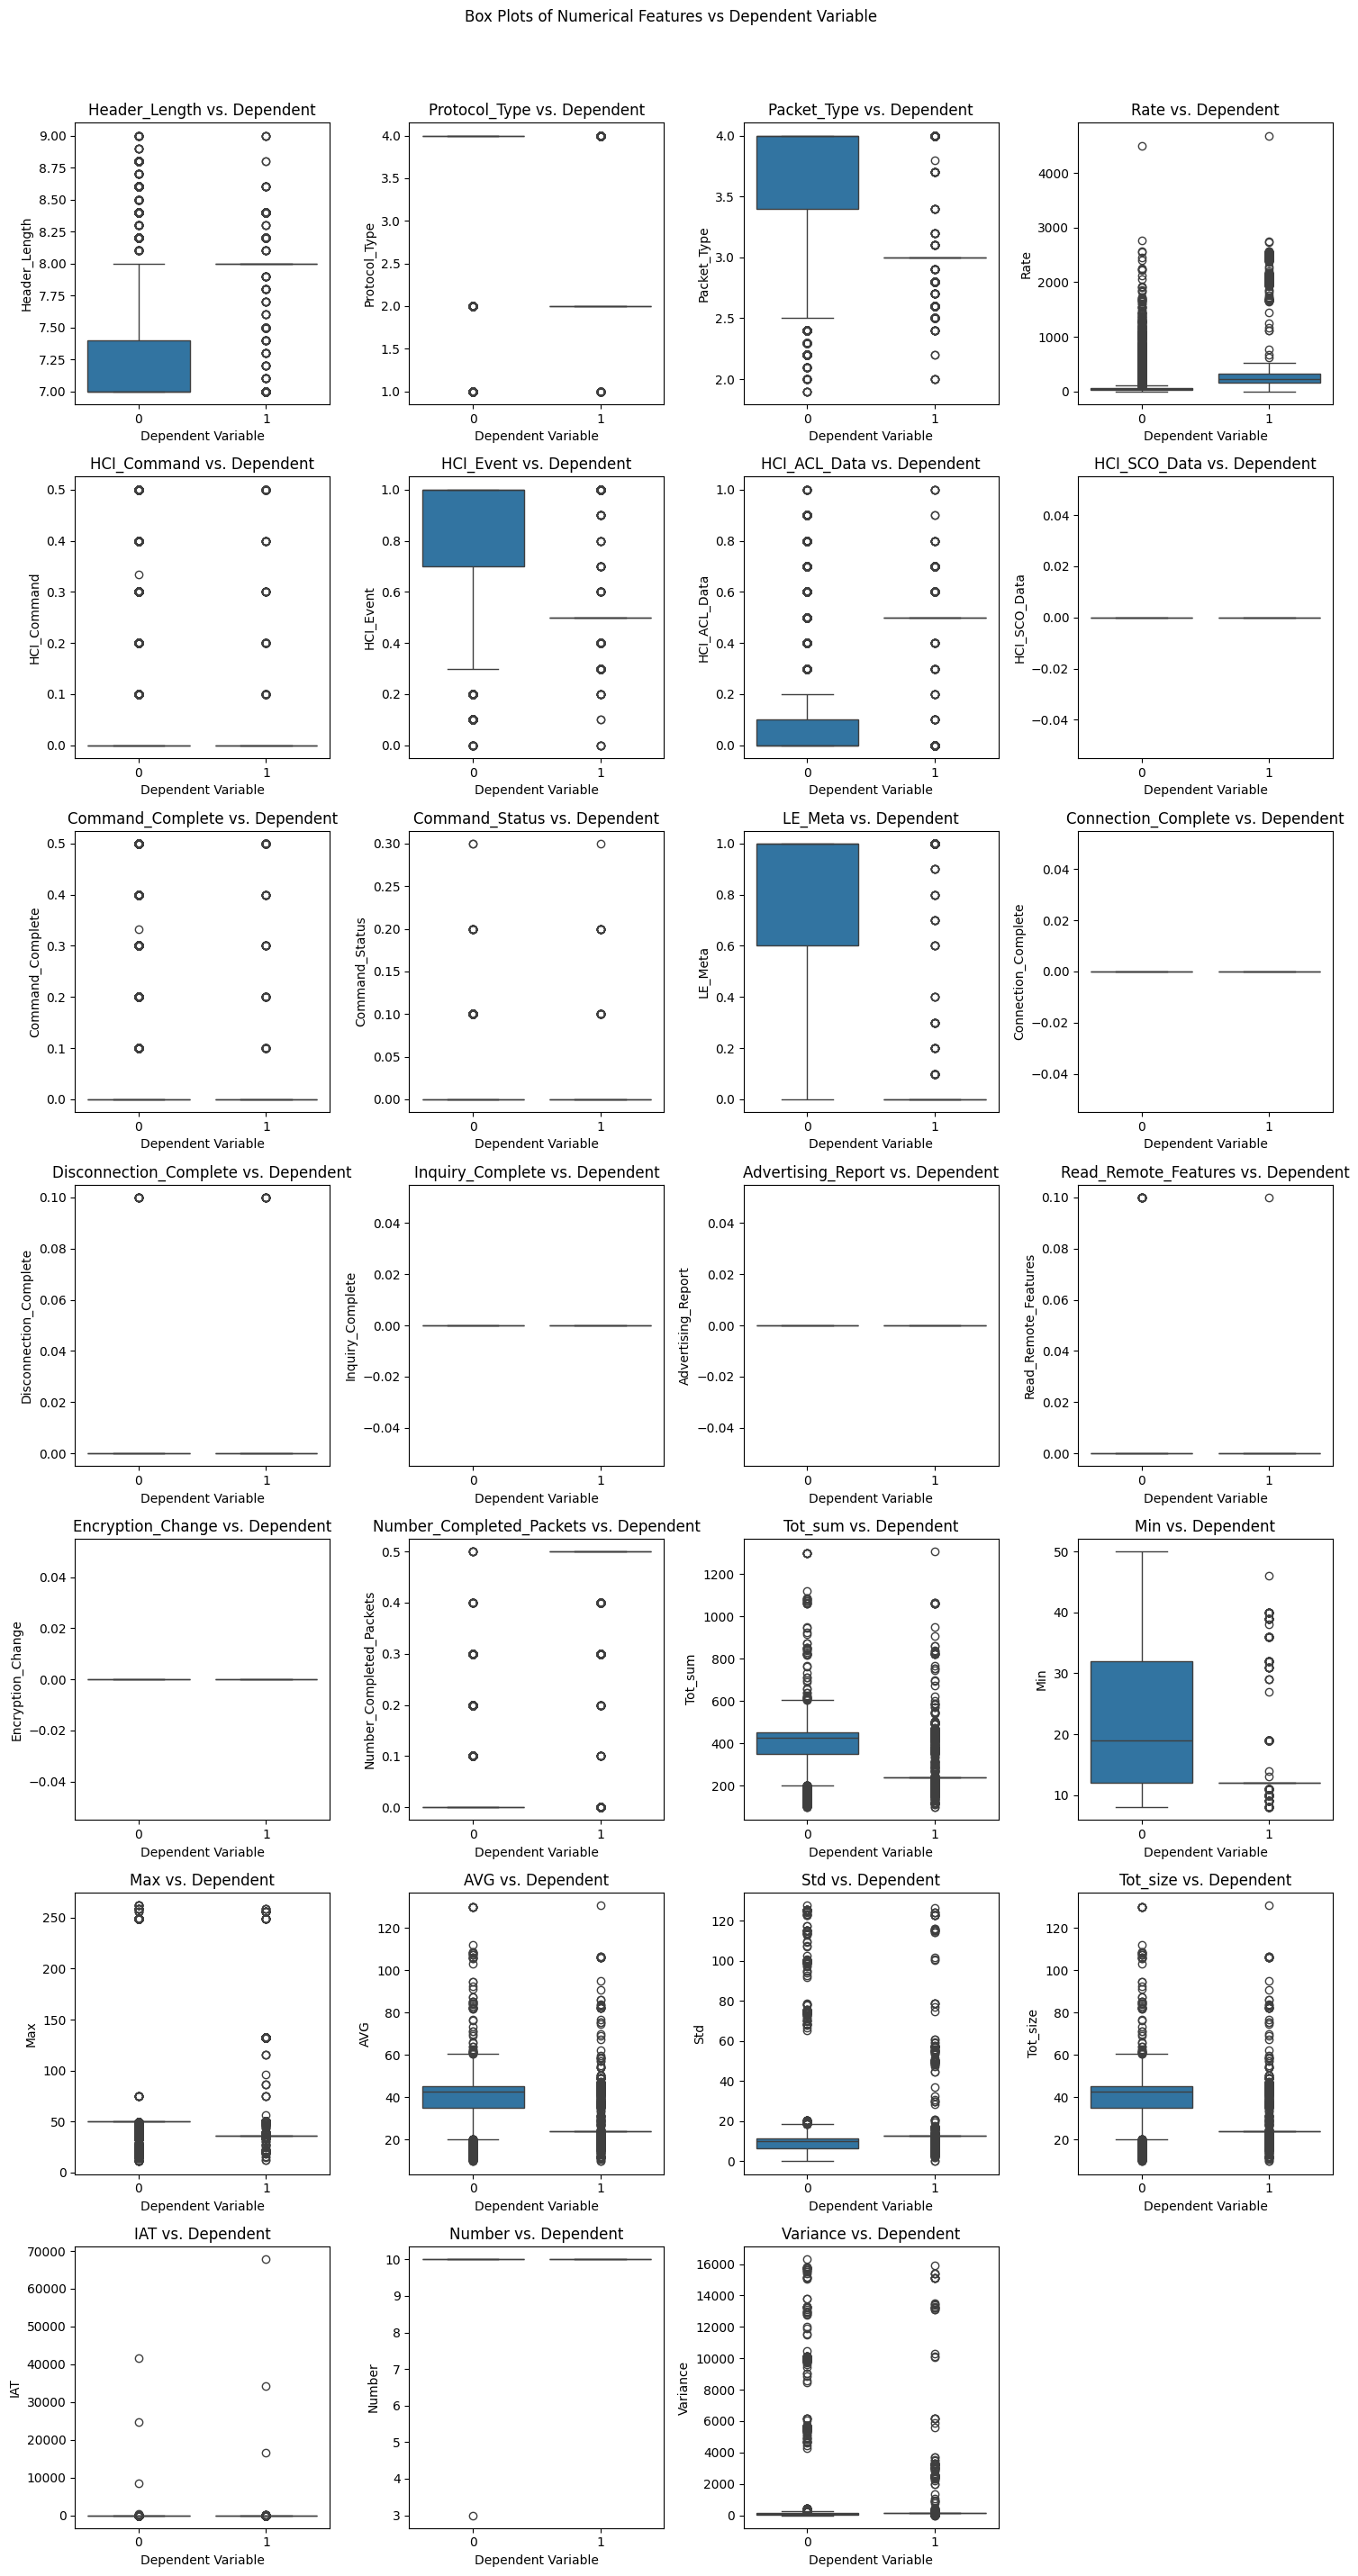

In [14]:
# Bivariate Analysis: Box plots of numerical features vs the target variable

numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('Dependent') # Remove the target variable

# Determine the number of rows and columns for the subplots
n_features = len(numerical_features)
n_cols = 4 # can adjust the number of columns 
n_rows = (n_features + n_cols - 1) // n_cols # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
fig.suptitle('Box Plots of Numerical Features vs Dependent Variable', y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create box plots for each numerical feature against the target variable
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Dependent', y=feature, data=df_train, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Dependent')
    axes[i].set_xlabel('Dependent Variable')
    axes[i].set_ylabel(feature)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Generate pair plot: Creating a pair plot for a selected subset of features to visualise relationships.


Selecting a subset of features that showed good distributions or relationships, including the 'Dependent' column, and then generating a pair plot to visualise the relationship between these selected features, colored by the 'Dependent' variable.

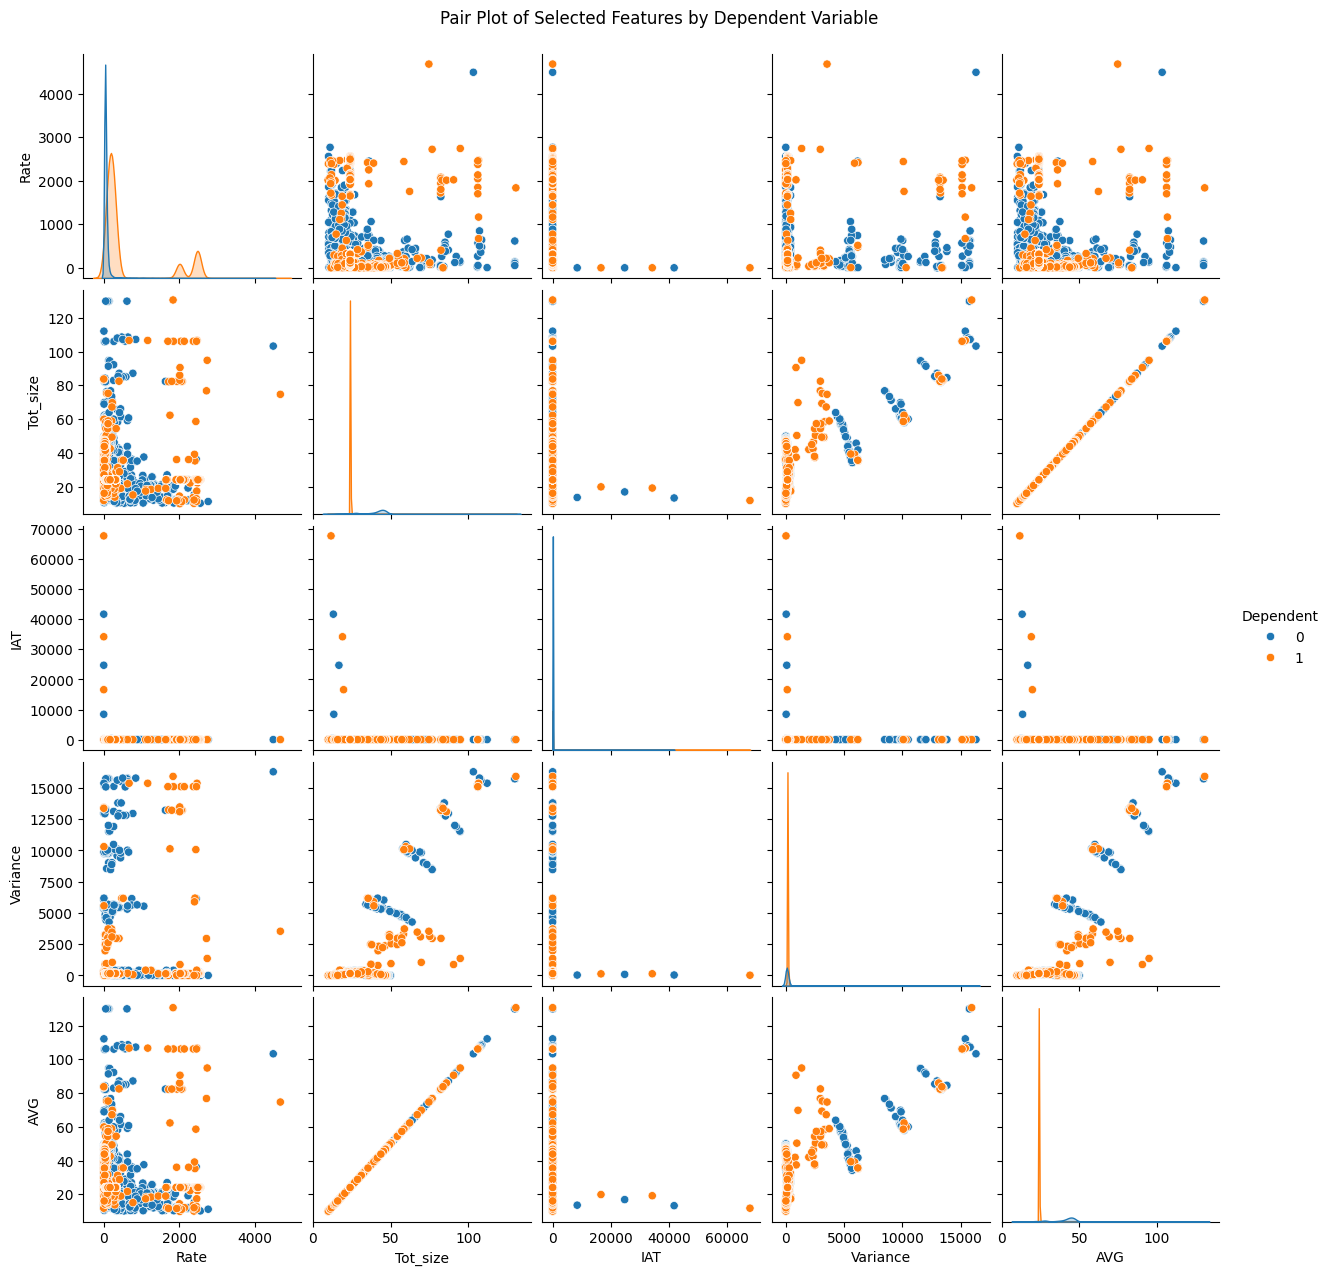

In [15]:
# # Select a subset of features based on previous analyses (e.g., features with varying distributions or potential relationship with Dependent)
selected_features_for_pairplot = ['Rate', 'Tot_size', 'IAT', 'Variance', 'AVG', 'Dependent']

# # Create a pair plot
sns.pairplot(df_train[selected_features_for_pairplot], hue='Dependent')
plt.suptitle('Pair Plot of Selected Features by Dependent Variable', y=1.02) # Add a title to the plot
plt.show()

Analyzing feature correlations: Calculating the correlation matrix for the training data and then visualising it as a heatmap with annotations to show the relationships between features.

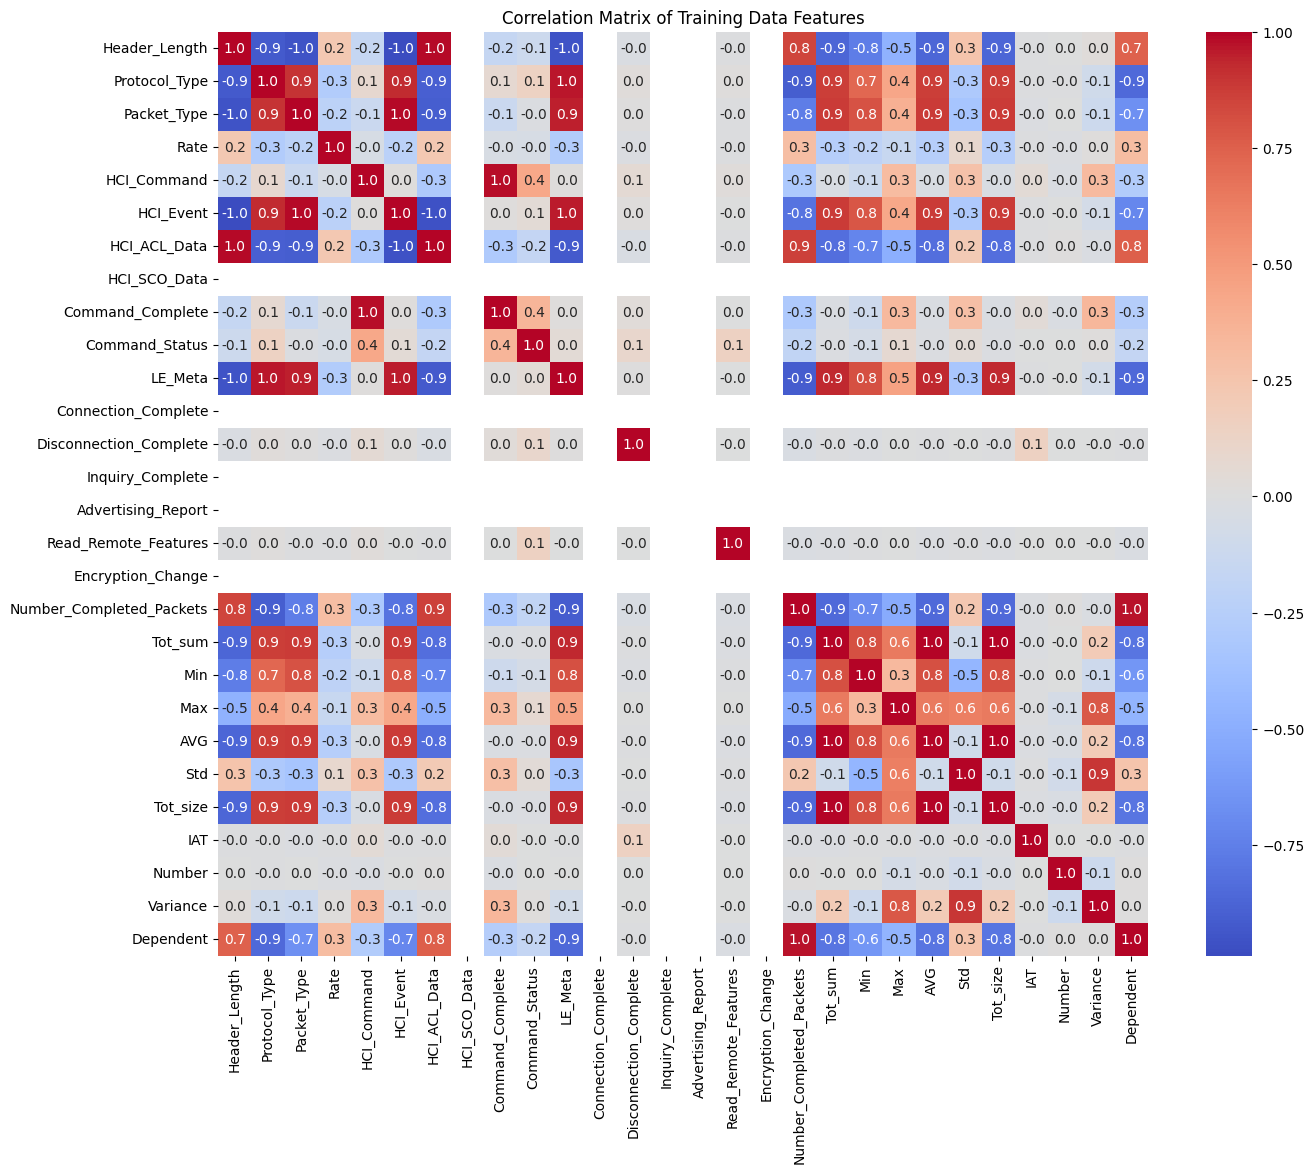

In [16]:
# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Training Data Features')
plt.show()

Identifying highly correlated features: Creating a table listing features with a correlation exceeding 70%.

Extracting the absolute value of the correlation matrix, stacking it, filtering for high correlations, sorting, converting to a DataFrame, renaming columns, and displaying.

In [17]:
# Extract absolute value of the correlation matrix
abs_correlation_matrix = correlation_matrix.abs()

# Stack the absolute correlation matrix and remove self-correlations
stacked_correlations = abs_correlation_matrix.stack()
filtered_correlations = stacked_correlations[(stacked_correlations > 0.7) & (stacked_correlations < 1)]

# Sort the filtered correlations in descending order
sorted_correlations = filtered_correlations.sort_values(ascending=False)

# Convert the sorted Series to a DataFrame
highly_correlated_features = sorted_correlations.reset_index()

# Rename the columns
highly_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Display the resulting DataFrame
print("Features with correlation exceeding 70%:")
display(highly_correlated_features)

Features with correlation exceeding 70%:


,Feature 1,Feature 2,Correlation
0,Tot_size,Tot_sum,0.999552
1,AVG,Tot_sum,0.999552
2,Tot_sum,Tot_size,0.999552
3,Tot_sum,AVG,0.999552
4,HCI_ACL_Data,Header_Length,0.989999
...,...,...,...
125,Protocol_Type,Min,0.727852
126,HCI_ACL_Data,Min,0.721300
127,Min,HCI_ACL_Data,0.721300
128,Dependent,HCI_Event,0.712988


Separating features and target: Splitting the datasets into independent variables (features) and the dependent variable (target).


Splitting the training and testing data into features (X) and the target variable (y), and printing their shapes.

In [18]:
X_train = df_train.drop('Dependent', axis=1)
y_train = df_train['Dependent']

X_test = df_test.drop('Dependent', axis=1)
y_test = df_test['Dependent']

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (87299, 27)
Shape of y_train: (87299,)
Shape of X_test: (30512, 27)
Shape of y_test: (30512,)


Appling SMOTE to balance only training data

In [19]:
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(sampling_strategy='not majority', random_state=42)
#smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Shape of X_train after SMOTE:", X_train_bal.shape)
print("Shape of y_train after SMOTE:", y_train_bal.shape)

print("Original training data before SMOTE:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Balanced training data after SMOTE:", dict(zip(*np.unique(y_train_bal, return_counts=True))))

Shape of X_train after SMOTE: (131098, 27)
Shape of y_train after SMOTE: (131098,)
Original training data before SMOTE: {np.int64(0): np.int64(21750), np.int64(1): np.int64(65549)}
Balanced training data after SMOTE: {np.int64(0): np.int64(65549), np.int64(1): np.int64(65549)}


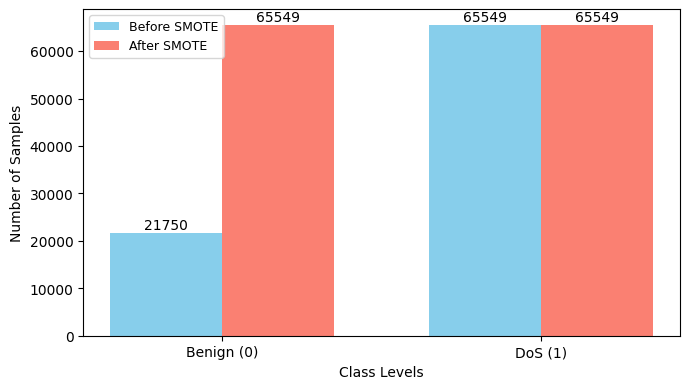

In [20]:
# Training data class size before and after using SMOTE

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import os

class_labels = ['Benign (0)', 'DoS (1)']

# Count samples per class before and after SMOTE
before = Counter(y_train)
after  = Counter(y_train_bal)

classes = list(range(2))
before_counts = [before[c] for c in classes]
after_counts  = [after[c] for c in classes]

x = np.arange(len(classes))
width = 0.35

plt.figure(figsize=(7, 4))

bars1 = plt.bar(x - width/2, before_counts, width,
                color="skyblue", label="Before SMOTE")
bars2 = plt.bar(x + width/2, after_counts, width,
                color="salmon", label="After SMOTE")

plt.xlabel("Class Levels")
plt.ylabel("Number of Samples")
#plt.title("Training Data: Before and After SMOTE")
plt.xticks(x, class_labels, rotation=0)
plt.legend(fontsize=9)

# -----------------------------
# Add value labels above bars
# -----------------------------
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + height * 0.003,      # slightly above the bar
            f'{int(height)}',
            ha='center', va='bottom',
            fontsize=10, fontweight='normal',
            color='black'
        )

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()

'''
output_folder = "results"  # To save in results folder
os.makedirs(output_folder, exist_ok=True)
output_file_path = os.path.join(output_folder, "final_data_dist_bt_after_smote.pdf")
plt.savefig(output_file_path, format="pdf", bbox_inches="tight", pad_inches=0.03)
'''

#plt.savefig("final_data_dist_bt_after_smote.pdf", format="pdf", bbox_inches="tight", pad_inches=0.03)

plt.show()

Scaling features: Applying Standard Scaling to the independent variables.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (131098, 27)
Shape of X_test_scaled: (30512, 27)


#### TM starts from here....

In [22]:
# Converting numerical data into binary

from sklearn.preprocessing import KBinsDiscretizer

kbd = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='quantile')
X_train_binned = kbd.fit_transform(X_train_scaled)
X_test_binned = kbd.transform(X_test_scaled)

Initializing stratified k-fold with the specified number of splits and random state for reproducibility.

In [23]:
from sklearn.model_selection import StratifiedKFold
# Set up stratified k-fold cross-validation
n_splits = 5 #keep it 5
random_state = 42
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

print(f"StratifiedKFold instantiated with n_splits={n_splits} and random_state={random_state}")

StratifiedKFold instantiated with n_splits=5 and random_state=42


Classifier: TM

Training Models with Stratified K-Fold

Initialising dictionaries to store performance metrics for each model and then looping through the folds of the stratified k-fold cross-validation. Inside the loop, initialising each model, training it on the training fold, making predictions on the validation fold, calculating performance metrics, and storing them.

In [24]:
import time
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tmu.models.classification.vanilla_classifier import TMClassifier
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
import warnings
warnings.filterwarnings('ignore')
import random

# Fix random seeds
np.random.seed(42)
random.seed(42)

# Initialise dictionaries to store performance metrics for each model
# time_taken = average inference time (in microseconds)

model_metrics = {
    'TM': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': [], 'time_taken': []}
}

X = X_train_binned.astype(np.uint32)
y = y_train_bal.astype(np.uint32)

for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
    print(f"--- Fold {fold+1}/{n_splits} ---")
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # --- Vanilla Tsetlin Machine ---
    print("Training TM")
    tm_model = MultiClassTsetlinMachine(number_of_clauses=100,T=10,s=2,boost_true_positive_feedback=1,weighted_clauses=False)

    X_train_dense = np.ascontiguousarray(X_train_fold, dtype=np.uint32)
    y_train_arr = np.ascontiguousarray(y_train_fold.astype(np.uint32))
    
    X_val_dense   = np.ascontiguousarray(X_val_fold, dtype=np.uint32)

    tm_model.fit(X_train_dense, y_train_arr, epochs=10)

    start_time = time.time()
    y_pred_tm = tm_model.predict(X_val_dense)
    end_time = time.time() 
    time_taken = (end_time - start_time)/X_val_dense.shape[0]
    time_taken = time_taken * 1e6 #(time_taken in micro sec)
    
    model_metrics['TM']['accuracy'].append(accuracy_score(y_val_fold, y_pred_tm))
    model_metrics['TM']['precision'].append(precision_score(y_val_fold, y_pred_tm))
    model_metrics['TM']['recall'].append(recall_score(y_val_fold, y_pred_tm))
    model_metrics['TM']['f1'].append(f1_score(y_val_fold, y_pred_tm))
    model_metrics['TM']['roc_auc'].append(roc_auc_score(y_val_fold, y_pred_tm))
    model_metrics['TM']['time_taken'].append(time_taken)

2026-02-24 15:11:55,946 - tmu.util.cuda_profiler - WARNING - Could not import pycuda: No module named 'pycuda'
2026-02-24 15:11:55,947 - tmu.clause_bank.clause_bank_cuda - ERROR - No module named 'pycuda'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tmu/clause_bank/clause_bank_cuda.py", line 40, in <module>
    import pycuda.driver as cuda
ModuleNotFoundError: No module named 'pycuda'
2026-02-24 15:11:55,948 - tmu.clause_bank.clause_bank_cuda - WARNING - Could not import pycuda. This indicates that it is not installed! A possible fix is to run 'pip install pycuda'. Fallback to CPU ClauseBanks.
--- Fold 1/5 ---
Training TM
--- Fold 2/5 ---
Training TM
--- Fold 3/5 ---
Training TM
--- Fold 4/5 ---
Training TM
--- Fold 5/5 ---
Training TM


In [25]:
# model_metrics

In [26]:
# Calculating average metrics for each model

average_metrics = {}
for model_name, metrics in model_metrics.items():
    average_metrics[model_name] = {metric_name: np.mean(metric_values) for metric_name, metric_values in metrics.items()}

# Convert to a DataFrame 
average_metrics_df = pd.DataFrame(average_metrics).T

print("Average performance across all folds:")
display(average_metrics_df)

Average performance across all folds:


,accuracy,precision,recall,f1,roc_auc,time_taken
TM,0.995934,0.999769,0.992098,0.995919,0.995934,0.752394


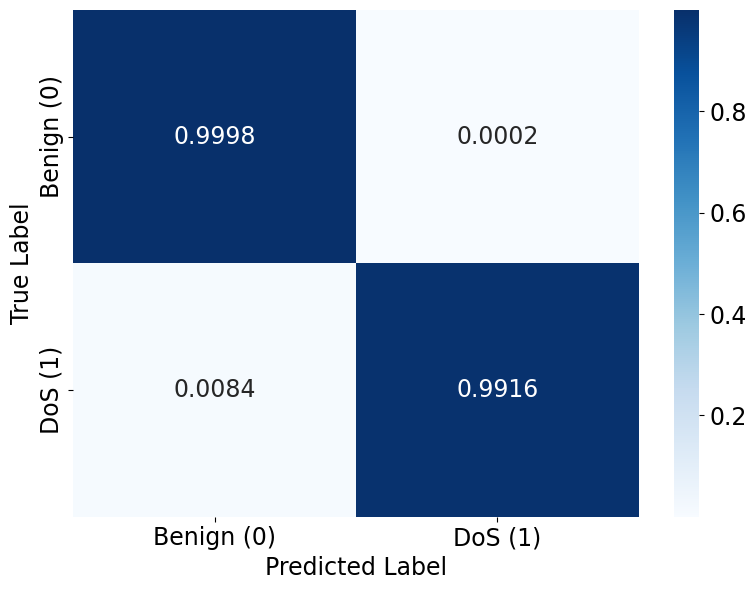

In [27]:
# Normalised Confusion matrix for Vanilla TM

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix  

class_names = ['Benign (0)', 'DoS (1)']
cm = confusion_matrix(y_val_fold, y_pred_tm, labels=[0, 1])

# Normalize (row-wise: each row sums to 1)
cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(8, 6))

ax = sns.heatmap(cm_normalized, annot=True, fmt=".4f", xticklabels=class_names, yticklabels=class_names, 
            cbar=True, cmap="Blues", annot_kws={"size": 17})

#plt.title("TM Normalized Confusion Matrix")
plt.xlabel("Predicted Label", fontsize = 17)
plt.ylabel("True Label", fontsize = 17)

# Increase tick label font size (class names)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=17)

# Increase colorbar tick font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)
plt.tight_layout()

'''
output_folder = "results"  # To save in results folder
os.makedirs(output_folder, exist_ok=True)
output_file_path = os.path.join(output_folder, "cm_norm_2class_bt_without_pca_TM.pdf")
plt.savefig(output_file_path, format="pdf", bbox_inches="tight", pad_inches=0.03)
'''

#plt.savefig("cm_norm_2class_bt_without_pca_TM.pdf", bbox_inches="tight", pad_inches=0.03)
plt.show()

In [28]:
# Classification report for each class in TM

from sklearn.metrics import classification_report

print(classification_report(y_val_fold, y_pred_tm))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13109
           1       1.00      0.99      1.00     13110

    accuracy                           1.00     26219
   macro avg       1.00      1.00      1.00     26219
weighted avg       1.00      1.00      1.00     26219



#### Full TM model with Interpretability plots

Binary classification with 2 classes using TM:

--- Fold 1/5 ---
Training Binary-class TM

--- Fold 2/5 ---
Training Binary-class TM

--- Fold 3/5 ---
Training Binary-class TM

--- Fold 4/5 ---
Training Binary-class TM

--- Fold 5/5 ---
Training Binary-class TM

Plotting Accuracy vs Epochs (TM – Last Fold)
Epoch 01 | Train Acc: 0.9961 | Val Acc: 0.9957
Epoch 02 | Train Acc: 0.9959 | Val Acc: 0.9954
Epoch 03 | Train Acc: 0.9957 | Val Acc: 0.9953
Epoch 04 | Train Acc: 0.9959 | Val Acc: 0.9955
Epoch 05 | Train Acc: 0.9959 | Val Acc: 0.9955
Epoch 06 | Train Acc: 0.9959 | Val Acc: 0.9954
Epoch 07 | Train Acc: 0.9960 | Val Acc: 0.9955
Epoch 08 | Train Acc: 0.9959 | Val Acc: 0.9955
Epoch 09 | Train Acc: 0.9958 | Val Acc: 0.9954
Epoch 10 | Train Acc: 0.9958 | Val Acc: 0.9955


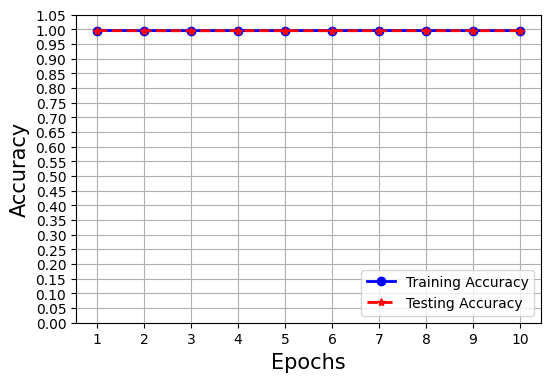


Plotting Training and Testing Time vs Epochs (TM – Last Fold)
Epoch 01 | Train Time: 0.1759 s | Test Time: 0.71 µs/sample
Epoch 02 | Train Time: 0.1714 s | Test Time: 0.71 µs/sample
Epoch 03 | Train Time: 0.1702 s | Test Time: 0.73 µs/sample
Epoch 04 | Train Time: 0.1712 s | Test Time: 0.74 µs/sample
Epoch 05 | Train Time: 0.1718 s | Test Time: 0.74 µs/sample
Epoch 06 | Train Time: 0.1727 s | Test Time: 0.73 µs/sample
Epoch 07 | Train Time: 0.1707 s | Test Time: 0.73 µs/sample
Epoch 08 | Train Time: 0.1693 s | Test Time: 0.73 µs/sample
Epoch 09 | Train Time: 0.1692 s | Test Time: 0.73 µs/sample
Epoch 10 | Train Time: 0.1693 s | Test Time: 0.73 µs/sample


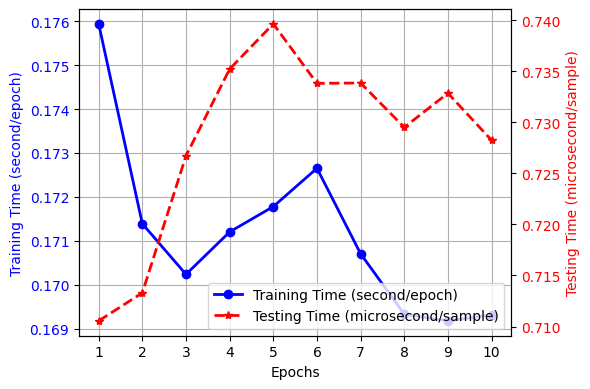

In [29]:
import os
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random

# Fix random seeds
np.random.seed(42)
random.seed(42)

# To save each plot in the results folder

RESULTS_DIR = "results"
os.makedirs(RESULTS_DIR, exist_ok=True)

############ Functions for Interpretability of TM ###############################################

# Interpretability visualisations include:
# 1. Clause activation heatmap for each class 
# 2. Combined Clause activation heatmap for all classes
# 3. Classwise combined heatmap
# 4. Clause polarity heatmap
# 5. Positive/negative clause distribution
# 6. Single-sample interpretability

class_names = {0: "Benign", 1: "DoS"}

# 1. Clause Activation Matrix for All Classes

def get_clause_activation_matrix(tm_model, num_features, num_classes):
    """
    Reconstruct clause activation matrix using ta_action(class, clause, ta)
    Works for older PyTsetlinMachine versions that do NOT expose full matrices.
    """
    num_clauses = tm_model.number_of_clauses
    
    clause_acts = {}

    for cls in range(num_classes):
        mat = np.zeros((num_clauses, num_features), dtype=int)

        for clause in range(num_clauses):
            for feat in range(num_features):

                # Positive literal TA
                pos_ta = tm_model.ta_action(cls, clause, feat)

                # Negative literal TA
                neg_ta = tm_model.ta_action(cls, clause, feat + num_features)

                # Clause activates feature if either literal is active
                mat[clause, feat] = 1 if (pos_ta > 0 or neg_ta > 0) else 0

        clause_acts[cls] = mat

    return clause_acts

# 2. Plot Per-Class Clause Activation Heatmaps

def plot_per_class_heatmaps(clause_acts, save_dir=None):
    for cls, mat in clause_acts.items():
        plt.figure(figsize=(10, 6))
        sns.heatmap(mat, cmap="viridis", cbar=True)
        plt.title(f"Clause Activation Heatmap – Class {cls}")
        plt.xlabel("Features")
        plt.ylabel("Clauses")
        plt.tight_layout()
        if save_dir:
            save_path = f"{save_dir}/per_class_heatmap_class_{cls}.pdf"
            plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
        plt.close()
        #plt.show()

# 3. Combined Clause Activation Heatmap Across All Classes

def plot_combined_heatmap(clause_acts, class_names, save_path=None):
    all_mats = np.stack(list(clause_acts.values()), axis=0)
    combined = all_mats.sum(axis=0)

    class_list = ", ".join([f"{cls} ({class_names.get(cls)})" for cls in clause_acts.keys()])

    plt.figure(figsize=(10, 6))
    sns.heatmap(combined, cmap="plasma", cbar=True)
    plt.title(f"Combined Clause Activation Heatmap\nClasses: {class_list}")
    plt.xlabel("Features")
    plt.ylabel("Clauses")
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
    plt.close()
    #plt.show()

# 4. Single-Sample Clause Activation (Interpretability)

def plot_single_sample_clause_activation(tm_model, x_sample, true_class, predicted_class, class_names, save_path=None):
    """
    Visualizes clause activations for a single sample.
    Shows: numeric class and class label.
    """

    # Get clause outputs
    clause_outputs = tm_model.transform(x_sample.reshape(1, -1))[0]

    # Get names
    true_name = class_names.get(true_class, "Unknown")
    pred_name = class_names.get(predicted_class, "Unknown")

    # Print evaluation information
    print("===== Single Sample Clause Activation Analysis =====")
    print(f"True Class:      {true_class} ({true_name})")
    print(f"Predicted Class: {predicted_class} ({pred_name})")
    print("====================================================")

    # Build plot
    x_axis = np.arange(len(clause_outputs))

    plt.figure(figsize=(12, 3))
    markerline, stemlines, baseline = plt.stem(x_axis, clause_outputs)
    plt.setp(stemlines, linewidth=1)
    plt.setp(markerline, markersize=4)

    plt.title(
        f"Clause Activation – True: {true_class} ({true_name}) | "
        f"Predicted: {predicted_class} ({pred_name})"
    )
    plt.xlabel("Clauses")
    plt.ylabel("Activation")
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
    plt.close()
    #plt.show()

    return clause_outputs

# 5. Classwise combined heatmap (Best for Papers)

def plot_classwise_combined_heatmap(clause_acts, class_names, save_path=None):
    """
    Create a class × feature heatmap by summing all clauses per class.
    """
    class_ids = list(clause_acts.keys())
    combined = np.vstack([clause_acts[c].sum(axis=0) for c in class_ids])
    labels = [class_names[c] for c in class_ids]

    plt.figure(figsize=(12, 6))
    sns.heatmap(combined, cmap="plasma", cbar=True, yticklabels=labels)
    plt.title("Class-wise Combined Clause Activation (Summed Over Clauses)")
    plt.xlabel("Features")
    plt.ylabel("Classes")
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
    plt.close()
    #plt.show()

# 6. Clause Polarity Heatmap (Highly Interpretable)

def plot_clause_polarity(tm_model, num_classes, class_names=None, save_path=None):
    """
    Plots a heatmap of clause polarity (+1 / -1) for all classes.
    No need for clause_sign() — polarity is determined by clause index:
        even number clause index = +1 (positive clause)
        odd number clause index  = -1 (negative clause)
        Green = Positive Clauses. These clauses vote for the class and represent evidence supporting the class.
        Red = Negative Clauses. These clauses vote against the class and represent evidence rejecting the class.
        White = Neutral (rare). Means the clause sign is 0 (usually does not happen unless custom training modifications)
    """
    num_clauses = tm_model.number_of_clauses

    polarity_matrix = []

    for cls in range(num_classes):
        # Even = positive, Odd = negative
        signs = np.array([1 if (i % 2 == 0) else -1 for i in range(num_clauses)])
        polarity_matrix.append(signs)

    polarity_matrix = np.array(polarity_matrix)

    # Class labels
    if class_names:
        y_labels = [f"{cls} ({class_names[cls]})" for cls in range(num_classes)]
    else:
        y_labels = [f"Class {cls}" for cls in range(num_classes)]

    plt.figure(figsize=(14, 5))
    sns.heatmap(
        polarity_matrix,
        cmap=sns.color_palette(["red", "white", "green"], as_cmap=True),
        cbar=True,
        center=0,
        yticklabels=y_labels
    )
    plt.title("Clause Polarity Heatmap (+1 Positive | -1 Negative)")
    plt.xlabel("Clauses")
    plt.ylabel("Classes")
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
    plt.close()
    #plt.show()

# 7. Positive vs Negative Clause Count Bar Plot
# Simpler version of plot 6.

def plot_clause_polarity_counts(tm_model, num_classes, class_names=None, save_path=None):

    num_clauses = tm_model.number_of_clauses

    # Half positive, half negative per class (TM property)
    pos_counts = [num_clauses // 2] * num_classes
    neg_counts = [num_clauses // 2] * num_classes

    labels = [class_names[c] if class_names else f"Class {c}" for c in range(num_classes)]

    x = np.arange(num_classes)        # label locations
    width = 0.35                      # width of the bars

    plt.figure(figsize=(10, 5))
    plt.bar(x - width/2, pos_counts, width, label="Positive Clauses (+1)")
    plt.bar(x + width/2, neg_counts, width, label="Negative Clauses (-1)")
    plt.xlabel("Classes")
    plt.ylabel("Number of Clauses")
    plt.title("Positive vs Negative Clause Counts per Class")
    plt.xticks(x, labels, rotation=0)
    plt.legend()
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
    plt.close()
    #plt.show()

############ Functions end here  ###########################################################

# Initialise dictionaries to store performance metrics for each model
# time_taken = average inference time (in microseconds)

num_classes = len(np.unique(y_train))
print(f"Binary classification with {num_classes} classes using TM:")

model_metrics = {
    'TM': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': [], 'time_taken': []}
}

X = X_train_binned.astype(np.uint32)
y = y_train_bal.astype(np.uint32)

# Storing the model after the last fold 
final_tm_model = None
final_X_val_dense = None
final_y_val_fold = None

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n--- Fold {fold+1}/{n_splits} ---")

    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # --- Multi-class Tsetlin Machine (Vanilla TM) for Binary Classification---
    print("Training Binary-class TM")
    tm_model = MultiClassTsetlinMachine(number_of_clauses=100,T=10,s=2,boost_true_positive_feedback=1,weighted_clauses=False)
    X_train_dense = np.ascontiguousarray(X_train_fold, dtype=np.uint32)
    y_train_arr = np.ascontiguousarray(y_train_fold.astype(np.uint32))

    X_val_dense   = np.ascontiguousarray(X_val_fold, dtype=np.uint32)

    tm_model.fit(X_train_dense, y_train_arr, epochs=10)

    # Storing last fold model for final Interpretability 
    if fold == n_splits - 1:
        final_tm_model = tm_model
        final_X_val_dense = X_val_dense
        final_y_val_fold = y_val_fold
        
    # Inference time per sample (in microseconds)
    start_time = time.time()
    y_pred_tm = tm_model.predict(X_val_dense)
    end_time = time.time() 
    time_taken = (end_time - start_time)/X_val_dense.shape[0]
    time_taken = time_taken * 1e6 #(time_taken in micro sec)
    
    model_metrics['TM']['accuracy'].append(accuracy_score(y_val_fold, y_pred_tm))
    model_metrics['TM']['precision'].append(precision_score(y_val_fold, y_pred_tm))
    model_metrics['TM']['recall'].append(recall_score(y_val_fold, y_pred_tm))
    model_metrics['TM']['f1'].append(f1_score(y_val_fold, y_pred_tm))
    model_metrics['TM']['roc_auc'].append(roc_auc_score(y_val_fold, y_pred_tm))
    model_metrics['TM']['time_taken'].append(time_taken)

############ Interpretability Functions are called here  ###################################################
#### All plots are obtained for the last fold output #######################################################

'''
# ----------- Clause Activation Heatmaps -------------------------------------------
num_features = final_X_val_dense.shape[1]
clause_acts = get_clause_activation_matrix(final_tm_model, num_features, num_classes)

print("\nPlotting per-class clause activation heatmaps")
plot_per_class_heatmaps(clause_acts, save_dir=RESULTS_DIR)

print("Plotting final combined classes clause activation heatmap")
plot_combined_heatmap(clause_acts, class_names, save_path=f"{RESULTS_DIR}/combined_heatmap.pdf")

# ----------- Classwise Combined Heatmap --------------------------------------------
print("\nPlotting final Classwise Combined Heatmap")
plot_classwise_combined_heatmap(clause_acts, class_names, save_path=f"{RESULTS_DIR}/classwise_combined_heatmap.pdf")

# ----------- Clause Polarity Heatmap -----------------------------------------------
print("\nPlotting final Clause Polarity Heatmap")
plot_clause_polarity(final_tm_model, num_classes, class_names, save_path=f"{RESULTS_DIR}/clause_polarity_heatmap.pdf")

# ----------- Positive vs Negative Clause Count Bar Plot ----------------------------
print("\nFinal Positive vs Negative Clause Count Bar Plot")
plot_clause_polarity_counts(final_tm_model, num_classes, class_names, save_path=f"{RESULTS_DIR}/clause_polarity_count.pdf")

# ----------- Single Sample Interpretability Analysis -------------------------------
sample_idx = 5000 # can change the index
x_sample = final_X_val_dense[sample_idx]
true_class = int(final_y_val_fold.iloc[sample_idx])
predicted_class = int(final_tm_model.predict(x_sample.reshape(1, -1))[0])
print(f"\nSingle-sample interpretability analysis for sample index: {sample_idx}\n")
plot_single_sample_clause_activation(final_tm_model, x_sample, true_class, predicted_class, class_names, 
                                     save_path=f"{RESULTS_DIR}/single_sample_interpretability.pdf")

'''
########################################################################################################
# Accuracy vs Epochs (TM – Last Fold Only)
########################################################################################################

from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

print("\n==============================================")
print("Plotting Accuracy vs Epochs (TM – Last Fold)")
print("==============================================")

# IMPORTANT:
# We reuse the LAST fold data already stored:
#   final_X_val_dense
#   final_y_val_fold
#   X_train_dense
#   y_train_arr

X_train_last = np.ascontiguousarray(X_train_dense, dtype=np.uint32)
y_train_last = np.ascontiguousarray(y_train_arr, dtype=np.uint32)

X_val_last = np.ascontiguousarray(final_X_val_dense, dtype=np.uint32)
y_val_last = np.ascontiguousarray(final_y_val_fold.astype(np.uint32))

# Re-initialize TM (do NOT reuse trained model)
tm_epoch = MultiClassTsetlinMachine(number_of_clauses=100,T=10,s=2,boost_true_positive_feedback=1,weighted_clauses=False)

num_epochs = 10
train_acc = []
val_acc = []

for epoch in range(1, num_epochs + 1):
    # Train one epoch
    tm_epoch.fit(X_train_last,y_train_last,epochs=1,incremental=True)

    # Predict
    train_pred = tm_epoch.predict(X_train_last)
    val_pred   = tm_epoch.predict(X_val_last)

    # Accuracy
    train_accuracy = accuracy_score(y_train_last, train_pred)
    val_accuracy   = accuracy_score(y_val_last, val_pred)

    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)

    print(f"Epoch {epoch:02d} | " f"Train Acc: {train_accuracy:.4f} | "f"Val Acc: {val_accuracy:.4f}")

# ------------------ Plot ------------------

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs, train_acc, color="blue", marker='o', linestyle='-', linewidth=2, label="Training Accuracy")
plt.plot(epochs, val_acc, color="red", marker='*', linestyle='--', linewidth=2, label="Testing Accuracy")  # Validation Accuracy
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
#plt.title("TM Accuracy vs Epochs (Last Fold)")
plt.legend(loc="lower right")
plt.grid(True)
plt.xticks(range(1, num_epochs + 1))
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.05))

#plt.savefig(f"{RESULTS_DIR}/tm_accuracy_vs_epochs_last_fold_bt_TM.pdf",
#          format="pdf",dpi=300,bbox_inches="tight", pad_inches=0.03)

#plt.close()
plt.show()

############################################################################################################
# Training and Testing Time vs Epochs (TM – Last Fold only)
############################################################################################################

import time
import pandas as pd

print("\n==============================================================")
print("Plotting Training and Testing Time vs Epochs (TM – Last Fold)")
print("================================================================")

# Reuse LAST fold data (already prepared)
X_train_last = np.ascontiguousarray(X_train_dense, dtype=np.uint32)
y_train_last = np.ascontiguousarray(y_train_arr, dtype=np.uint32)

X_val_last = np.ascontiguousarray(final_X_val_dense, dtype=np.uint32)
y_val_last = np.ascontiguousarray(final_y_val_fold.astype(np.uint32))

# Re-initialize TM (fresh model)
tm_time = MultiClassTsetlinMachine(number_of_clauses=100, T=10, s=2, boost_true_positive_feedback=1, weighted_clauses=False)

num_epochs = 10
train_time_epoch = []
test_time_epoch = []

for epoch in range(1, num_epochs + 1):

    # ---------- Training time (one epoch) ----------
    start_train = time.time()
    tm_time.fit(X_train_last,y_train_last,epochs=1,incremental=True)
    end_train = time.time()

    train_time = end_train - start_train
    train_time_epoch.append(train_time)

    # ---------- Testing/Inference time ----------
    start_test = time.time()
    _ = tm_time.predict(X_val_last)
    end_test = time.time()

    test_time = (end_test - start_test) / X_val_last.shape[0]
    test_time = test_time * 1e6   # microseconds per sample
    test_time_epoch.append(test_time)

    print(f"Epoch {epoch:02d} | "f"Train Time: {train_time:.4f} s | "f"Test Time: {test_time:.2f} µs/sample")

# ------------------ Plot ------------------

epochs = range(1, num_epochs + 1)

fig, ax1 = plt.subplots(figsize=(6, 4))

# Training time 
ax1.plot(epochs, train_time_epoch, color="blue", marker='o', linestyle='-', linewidth=2,label="Training Time (second/epoch)")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Training Time (second/epoch)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(True)

# Testing time 
ax2 = ax1.twinx()
ax2.plot(epochs, test_time_epoch, color="red", marker='*', linestyle='--', linewidth=2, label="Testing Time (microsecond/sample)")
ax2.set_ylabel("Testing Time (microsecond/sample)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="lower right")

# plt.title("TM Training and Testing Time vs Epochs (Last Fold)")
plt.tight_layout()
plt.xticks(range(1, num_epochs + 1))

#plt.savefig(f"{RESULTS_DIR}/tm_training_testing_time_vs_epochs_last_fold_bt_TM.pdf",
#           format="pdf",dpi=300,bbox_inches="tight", pad_inches=0.03)

#plt.close()
plt.show()

In [30]:
# Calculate average metrics for each model

average_metrics = {}
for model_name, metrics in model_metrics.items():
    average_metrics[model_name] = {metric_name: np.mean(metric_values) for metric_name, metric_values in metrics.items()}

# Convert to a DataFrame for easy display
average_metrics_df = pd.DataFrame(average_metrics).T

print("Average performance metrics across all folds:")
display(average_metrics_df)

Average performance metrics across all folds:


,accuracy,precision,recall,f1,roc_auc,time_taken
TM,0.995904,0.999754,0.992052,0.995888,0.995904,0.747091


#### Class vote for a single sample and bar plot

0
(1, 200)
uint32
(2, 100)
37
41
{0: np.int32(-3), 1: np.int32(-4)}
0

========== Class Votes for a Single Sample ==========
Sample index   : 565
True label     : 0 (Benign)
Predicted label: 0 (Benign)
Decision       : Correct
---------------------------------------------------
Class 0 (Benign): Vote = -3
Class 1 (DoS): Vote = -4


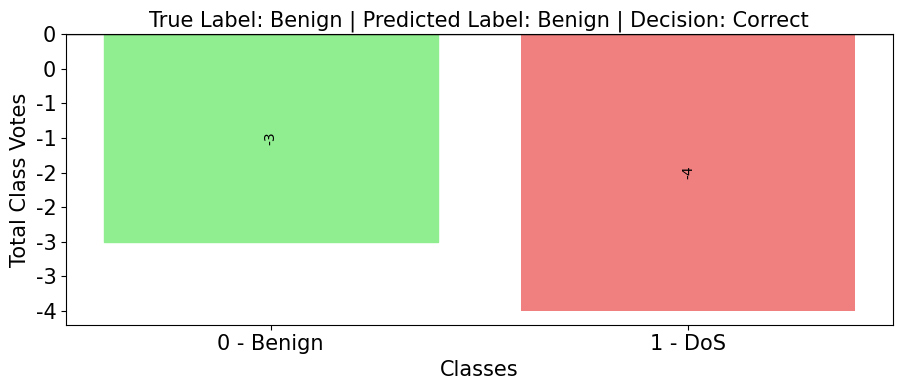

In [42]:
# Step A — Extract clause activations

import numpy as np
import random

# Fix random seeds
np.random.seed(42)
random.seed(42)

num_classes = 2 # binary task
num_clauses = final_tm_model.number_of_clauses
half = num_clauses // 2   # positive / negative split

# Select one sample
sample_idx = 565 # Can change the sample index here (keep it 5) 
x_sample = final_X_val_dense[sample_idx:sample_idx+1]
true_label = int(final_y_val_fold.iloc[sample_idx])
print(true_label)

# TM clause outputs
out = final_tm_model.transform(x_sample)
print(out.shape)
print(out.dtype)

# Reshape to (C, K)
out = out.reshape(num_classes, num_clauses)
print(out.shape)

# Step B — Compute class votes

class_votes = {}

for c in range(num_classes):
    pos_votes = np.sum(out[c, :half], dtype=np.int32)  # positive votes
    neg_votes = np.sum(out[c, half:], dtype=np.int32)  # negative votes
    vote = pos_votes - neg_votes       # final votes
    class_votes[c] = vote
print(pos_votes)
print(neg_votes)
print(class_votes)

# Step C — Prediction and correctness

predicted_class = max(class_votes, key=class_votes.get)
print(predicted_class)

decision = "Correct" if predicted_class == true_label else "Incorrect"

# Print class-wise vote table

print("\n========== Class Votes for a Single Sample ==========")
print(f"Sample index   : {sample_idx}")
print(f"True label     : {true_label} ({class_names[true_label]})")
print(f"Predicted label: {predicted_class} ({class_names[predicted_class]})")
print(f"Decision       : {decision}")
print("---------------------------------------------------")

for c, v in class_votes.items():
    print(f"Class {c} ({class_names[c]}): Vote = {v}")

print("===================================================")

# Bar plot of class votes

import matplotlib.pyplot as plt

# Prepare x-axis labels with class number + name
x_labels = [f"{c} - {class_names[c]}" for c in range(num_classes)]
votes = [class_votes[c] for c in range(num_classes)]

plt.figure(figsize=(9, 4))

bars = plt.bar(x_labels,votes,color="lightcoral")

# Highlight predicted class
bars[predicted_class].set_color("lightgreen")

# Vertical vote labels inside bars
# Define a minimum visible height (relative to y-scale)

MIN_LABEL_HEIGHT = 0.05   # (adjust if needed)

for i, bar in enumerate(bars):
    value = votes[i]

    # Choose y-position
    if abs(value) < MIN_LABEL_HEIGHT:
        y_pos = MIN_LABEL_HEIGHT
    else:
        y_pos = value / 2

    plt.text(
        bar.get_x() + bar.get_width() / 2,
        y_pos,
        f"{int(value)}",
        ha="center",
        va="center",
        rotation=90,
        fontsize=10,
        fontweight="normal",
        color="black"
    )

plt.axhline(0, color="black", linewidth=1)

#plt.ylabel("Total Class Votes")
plt.xlabel("Classes", fontsize=15)

plt.title(
    f"True Label: {class_names[true_label]} | "
    f"Predicted Label: {class_names[predicted_class]} | "
    f"Decision: {decision}",
    fontsize=15)

plt.xticks(rotation=0, ha="center",fontsize=15)
plt.tight_layout()

from matplotlib.ticker import FuncFormatter

ax = plt.gca()

ax.ticklabel_format(axis='y', style='plain', useOffset=False)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{int(y)}"))

plt.ylabel("Total Class Votes", fontsize=15)
plt.yticks(fontsize=15)

#plt.savefig(f"{RESULTS_DIR}/single_sample_class_votes_bt_TM.pdf",
 #           dpi=300,bbox_inches="tight", pad_inches=0.03)

#plt.close()

plt.show()

#### Clause-level vote contributions for all 7 classes in one heatmap for a single sample

0
0


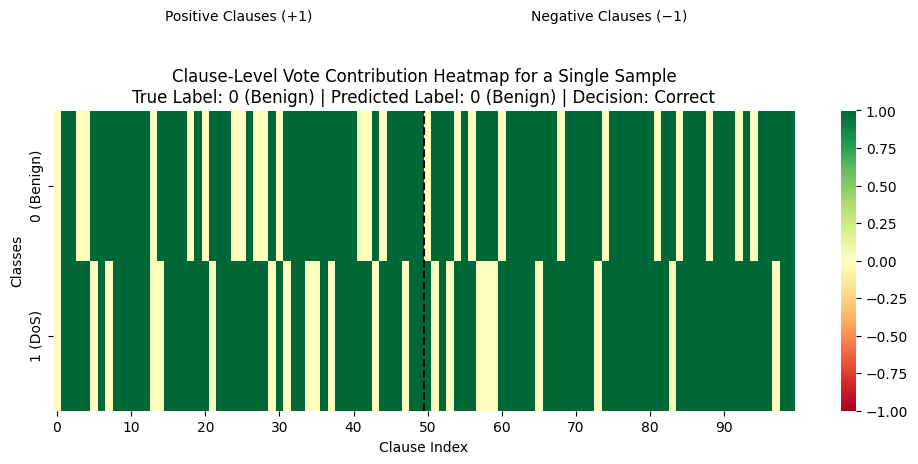

In [43]:
# STEP 1 — Prepare the single sample

import numpy as np
import random

# Fix random seeds
np.random.seed(42)
random.seed(42)

num_classes = 2 # binary task
num_clauses = final_tm_model.number_of_clauses
half = num_clauses // 2

# Select one sample
sample_idx = 565 # can change the sample index
x_sample = final_X_val_dense[sample_idx:sample_idx+1]

true_label = int(final_y_val_fold.iloc[sample_idx])
predicted_label = int(final_tm_model.predict(x_sample)[0])
decision = "Correct" if predicted_label == true_label else "Incorrect"
print(true_label)
print(predicted_label)

# STEP 2 — Get clause activations

# TM transform output
out = final_tm_model.transform(x_sample)

# Reshape to (classes, clauses)
out = out.reshape(num_classes, num_clauses)

# STEP 3 — Compute clause-level vote contributions (All classes)

# Contribution matrix: (classes × clauses)
contribution_matrix = np.zeros((num_classes, num_clauses), dtype=int)

for c in range(num_classes):
    # Positive clauses (+1)
    contribution_matrix[c, :half] = out[c, :half]

    # Negative clauses (−1)
    contribution_matrix[c, half:] = -out[c, half:]
    
# STEP 4 — Plot one combined heatmap

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ----- Y-axis order: class 0 (Benign) at TOP -----
y_order = list(range(num_classes))

# Reorder contribution matrix
contribution_matrix_ordered = contribution_matrix[y_order, :]

# Y-axis labels with class number + name
y_labels = [f"{i} ({class_names[i]})" for i in y_order]

plt.figure(figsize=(10, 5))

plt.text(half / 2, -0.6, "Positive Clauses (+1)", ha="center", fontsize=10)
plt.text(half + half / 2, -0.6, "Negative Clauses (−1)", ha="center", fontsize=10)

sns.heatmap(contribution_matrix_ordered,cmap="RdYlGn",center=0,vmin=-1,vmax=1,cbar=True, yticklabels=y_labels,xticklabels=False)

plt.axvline(x=half, color="black", linewidth=1.5, linestyle="--")
plt.xlabel("Clause Index")
plt.ylabel("Classes")

plt.title(
    f"Clause-Level Vote Contribution Heatmap for a Single Sample\n"
    f"True Label: {true_label} ({class_names[true_label]}) | "
    f"Predicted Label: {predicted_label} ({class_names[predicted_label]}) | "
    f"Decision: {decision}"
)

# X-axis ticks: 0, 10, 20, ..., 119
x_tick_labels = list(range(0, num_clauses, 10))
x_tick_positions = [i + 0.5 for i in range(0, num_clauses, 10)]

plt.xticks(ticks=x_tick_positions,labels=x_tick_labels,rotation=0)

plt.tight_layout()

#plt.savefig(f"{RESULTS_DIR}/single_sample_clause_vote_contri_all_classes_bt_TM.pdf",format="pdf",
#            dpi=300,bbox_inches="tight", pad_inches=0.03)

#plt.close()

plt.show()

#### Clause activation heatmap for a single sample

<class 'int'>
100
0
0


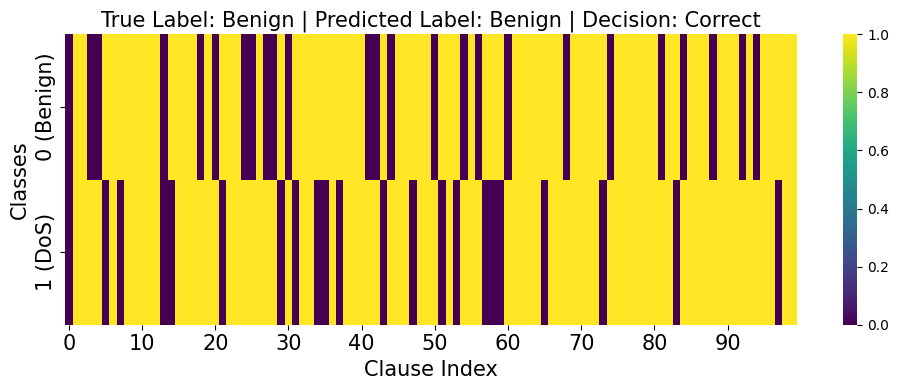

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Fix random seeds
np.random.seed(42)
random.seed(42)

# ---------------- Parameters ----------------
num_classes = 2 # binary task
num_clauses = final_tm_model.number_of_clauses  # e.g., 100
print(type(num_clauses))
print(num_clauses)

# ---------------- Select one sample ----------------
sample_idx = 565  # change as needed
x_sample = final_X_val_dense[sample_idx:sample_idx + 1]

true_label = int(final_y_val_fold.iloc[sample_idx])
predicted_label = int(final_tm_model.predict(x_sample)[0])
decision = "Correct" if predicted_label == true_label else "Incorrect"
print(true_label)
print(predicted_label)

# ---------------- Get clause activations ----------------
# TM transform output
out = final_tm_model.transform(x_sample)        # shape: (1, C*K) or (1, C, K)
out = out.reshape(num_classes, num_clauses)     # shape: (classes, clauses)

# ---------------- Class order: class 0 (Benign) at Top ----------------
# Order: 0,1
y_order = list(range(num_classes))

out_ord = out[y_order, :]
y_labels = [f"{i} ({class_names[i]})" for i in y_order]

# ---------------- Plot heatmap ----------------
plt.figure(figsize=(10, 4))

sns.heatmap(out_ord,cmap="viridis",cbar=True,yticklabels=y_labels,xticklabels=False)

plt.xlabel("Clause Index", fontsize=15)
plt.ylabel("Classes", fontsize=15)
plt.yticks(fontsize=15)

plt.title(
    f"True Label: {class_names[true_label]} | "
    f"Predicted Label: {class_names[predicted_label]} | "
    f"Decision: {decision}",
    fontsize=15
)

# ---------------- X-axis ticks: 0, 10, 20, …, 120 ----------------
x_tick_labels = list(range(0, num_clauses, 10))
x_tick_positions = [i + 0.5 for i in range(0, num_clauses, 10)] 

plt.xticks(ticks=x_tick_positions,labels=x_tick_labels,rotation=0, fontsize=15)

plt.tight_layout()

#plt.savefig(f"{RESULTS_DIR}/single_sample_clause_activation_heatmap_bt_TM.pdf",format="pdf",
#           dpi=300,bbox_inches="tight", pad_inches=0.03)

#plt.close()

plt.show()

In [34]:
#done